Lambda School Data Science
Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

In [3]:
import pandas as pd

df = pd.read_csv('data/steam.csv')

In [4]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [5]:
#set target to owners 
target = 'owners'

In [6]:
df[target].value_counts(normalize=True)

0-20000                0.686833
20000-50000            0.112982
50000-100000           0.062604
100000-200000          0.051191
200000-500000          0.046981
500000-1000000         0.018947
1000000-2000000        0.010637
2000000-5000000        0.007128
5000000-10000000       0.001699
10000000-20000000      0.000776
20000000-50000000      0.000111
50000000-100000000     0.000074
100000000-200000000    0.000037
Name: owners, dtype: float64

In [ ]:
# it looks like it will be a classification problem that is strongly distributed to the smaller values (tailing left)

In [ ]:
# train, test, and val should be split by time using 'release_date'

In [7]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [8]:
df['required_age'].value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

In [9]:
df['steamspy_tags'].value_counts()

Action;Indie;Casual                 845
Action;Adventure;Indie              714
Early Access;Action;Indie           507
Adventure;Indie;Casual              442
Indie;Casual                        378
                                   ... 
Tower Defense;FPS;Co-op               1
Indie;Puzzle-Platformer;Strategy      1
Simulation;Sandbox;War                1
RPG;Comedy;Dark Humor                 1
Strategy;Card Game;Multiplayer        1
Name: steamspy_tags, Length: 6423, dtype: int64

In [10]:
target = 'owners'
features = ['english', 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'price']
#to be cleaned later 'developer', 'publisher', 'genres', 'platforms', 'release_date', 
# features that should be dropped include:
# 'appid', 'name', 'categories' and 'steamspy_tags' (as they're nearly the same as 'genre')
# need to encode genre tags so values are separated

# thankfully, it looks like with the target I've selected there will be no time-travelling in my model

In [11]:
from sklearn.model_selection import train_test_split

# get train and test sets from the original dataframe
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# get val by splitting train again
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(21660, 8) (5415, 8)
(17328, 8) (4332, 8)


In [12]:
#make some exploratory visualizations
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

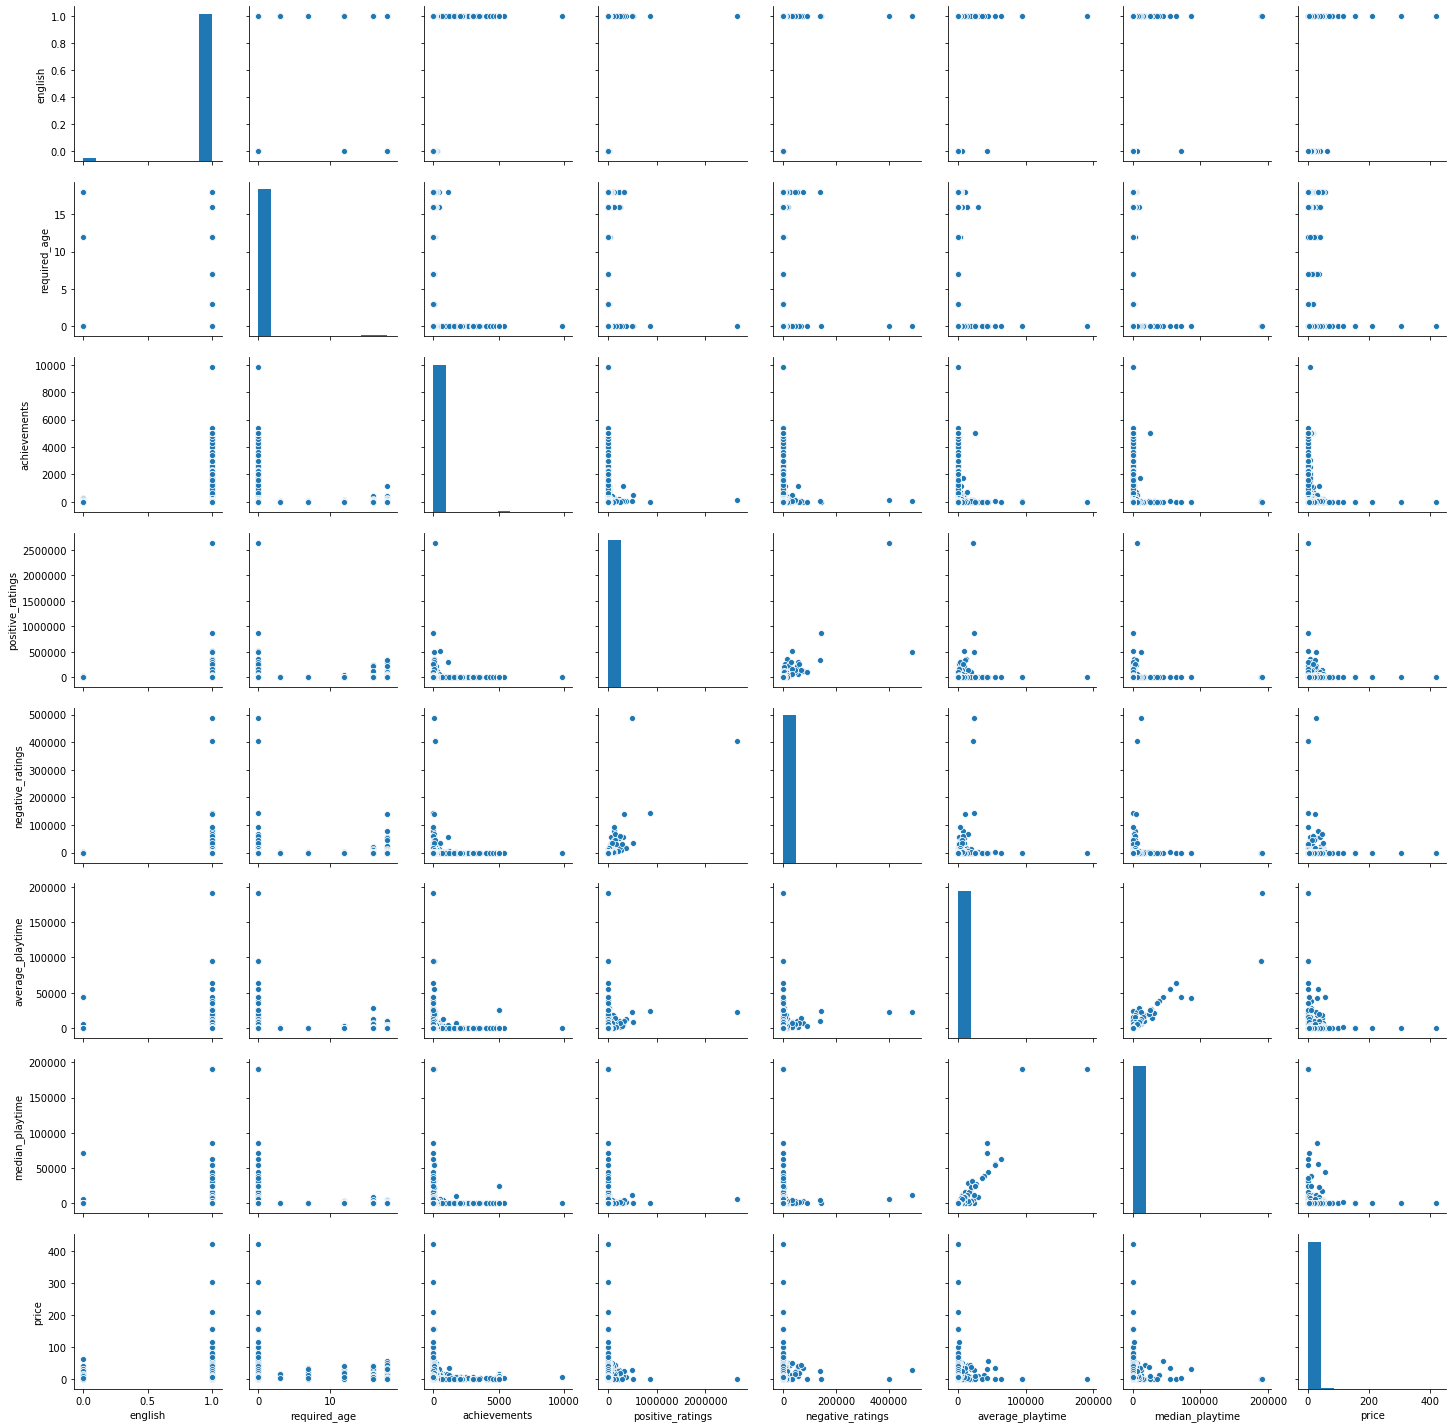

In [13]:
ax = sns.pairplot(df[features])

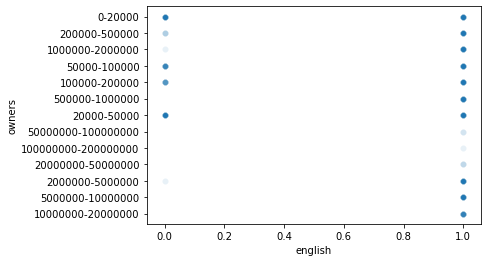

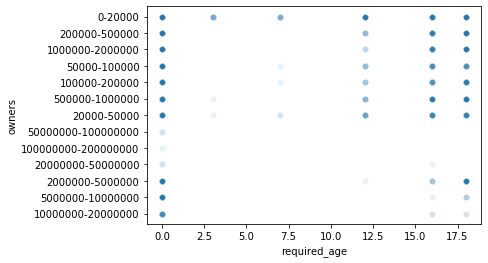

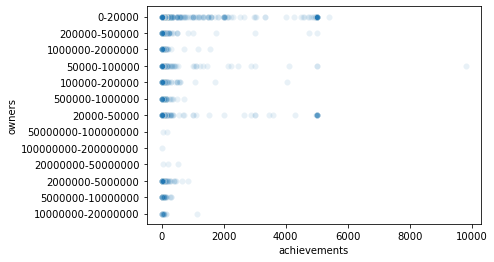

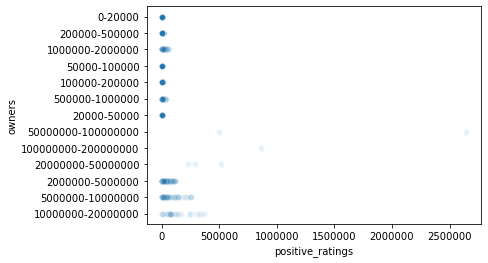

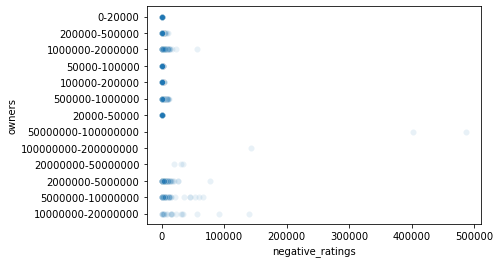

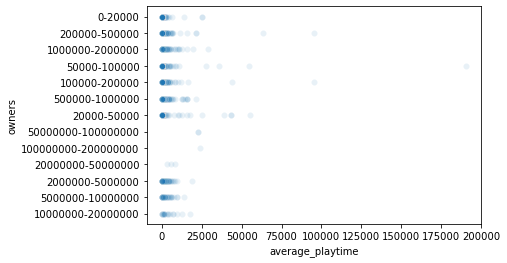

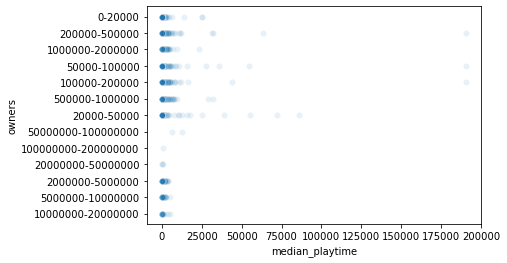

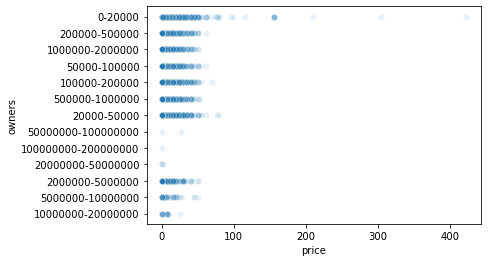

In [14]:
for feature in features:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

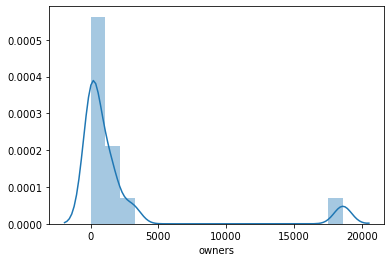

In [15]:
ax = sns.distplot(df[target].value_counts())

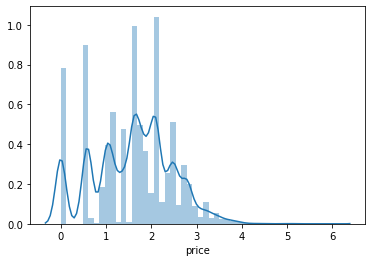

In [17]:
y = df['price']
y_log = np.log1p(y)
ax = sns.distplot(y_log)

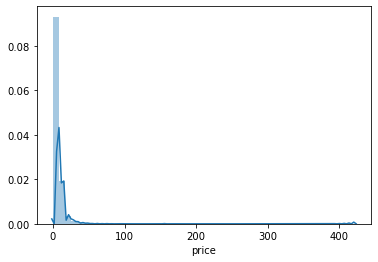

In [18]:
ax = sns.distplot(y)

In [19]:
# determine a baseline
df[target].value_counts(normalize=True)

0-20000                0.686833
20000-50000            0.112982
50000-100000           0.062604
100000-200000          0.051191
200000-500000          0.046981
500000-1000000         0.018947
1000000-2000000        0.010637
2000000-5000000        0.007128
5000000-10000000       0.001699
10000000-20000000      0.000776
20000000-50000000      0.000111
50000000-100000000     0.000074
100000000-200000000    0.000037
Name: owners, dtype: float64

In [20]:
#fit a random forest classifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

RFC_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
)
RFC_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_lea

In [21]:
print('Validation accuracy', RFC_pipeline.score(X_val, y_val))

Validation accuracy 0.7774699907663897


In [29]:
#try XGBoost!
from xgboost import XGBClassifier

GB_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state = 42, n_jobs = -1)
)

GB_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
       

In [30]:
from sklearn.metrics import accuracy_score

y_pred = GB_pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7841643582640813


In [24]:
#Get Permutation importance for the features
transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_t = transformer.fit_transform(X_train)
X_val_t = transformer.fit_transform(X_val)

RFC_prep_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
RFC_prep_model.fit(X_train_t, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    RFC_prep_model,
    scoring='accuracy',
    n_iter=5,
    random_state=42,
)

permuter.fit(X_val_t, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [26]:
f_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, f_names).sort_values(ascending=False)

negative_ratings    0.102447
positive_ratings    0.085503
price               0.027793
average_playtime    0.018975
median_playtime     0.017175
achievements        0.004109
required_age        0.000462
english             0.000231
dtype: float64

In [27]:
# Make a Partial Dependent Plot PDP
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot

plt.rcParams['figure.dpi'] = 72

In [43]:
encoder = ce.OrdinalEncoder()
X=df[features]
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
y=df[target]
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

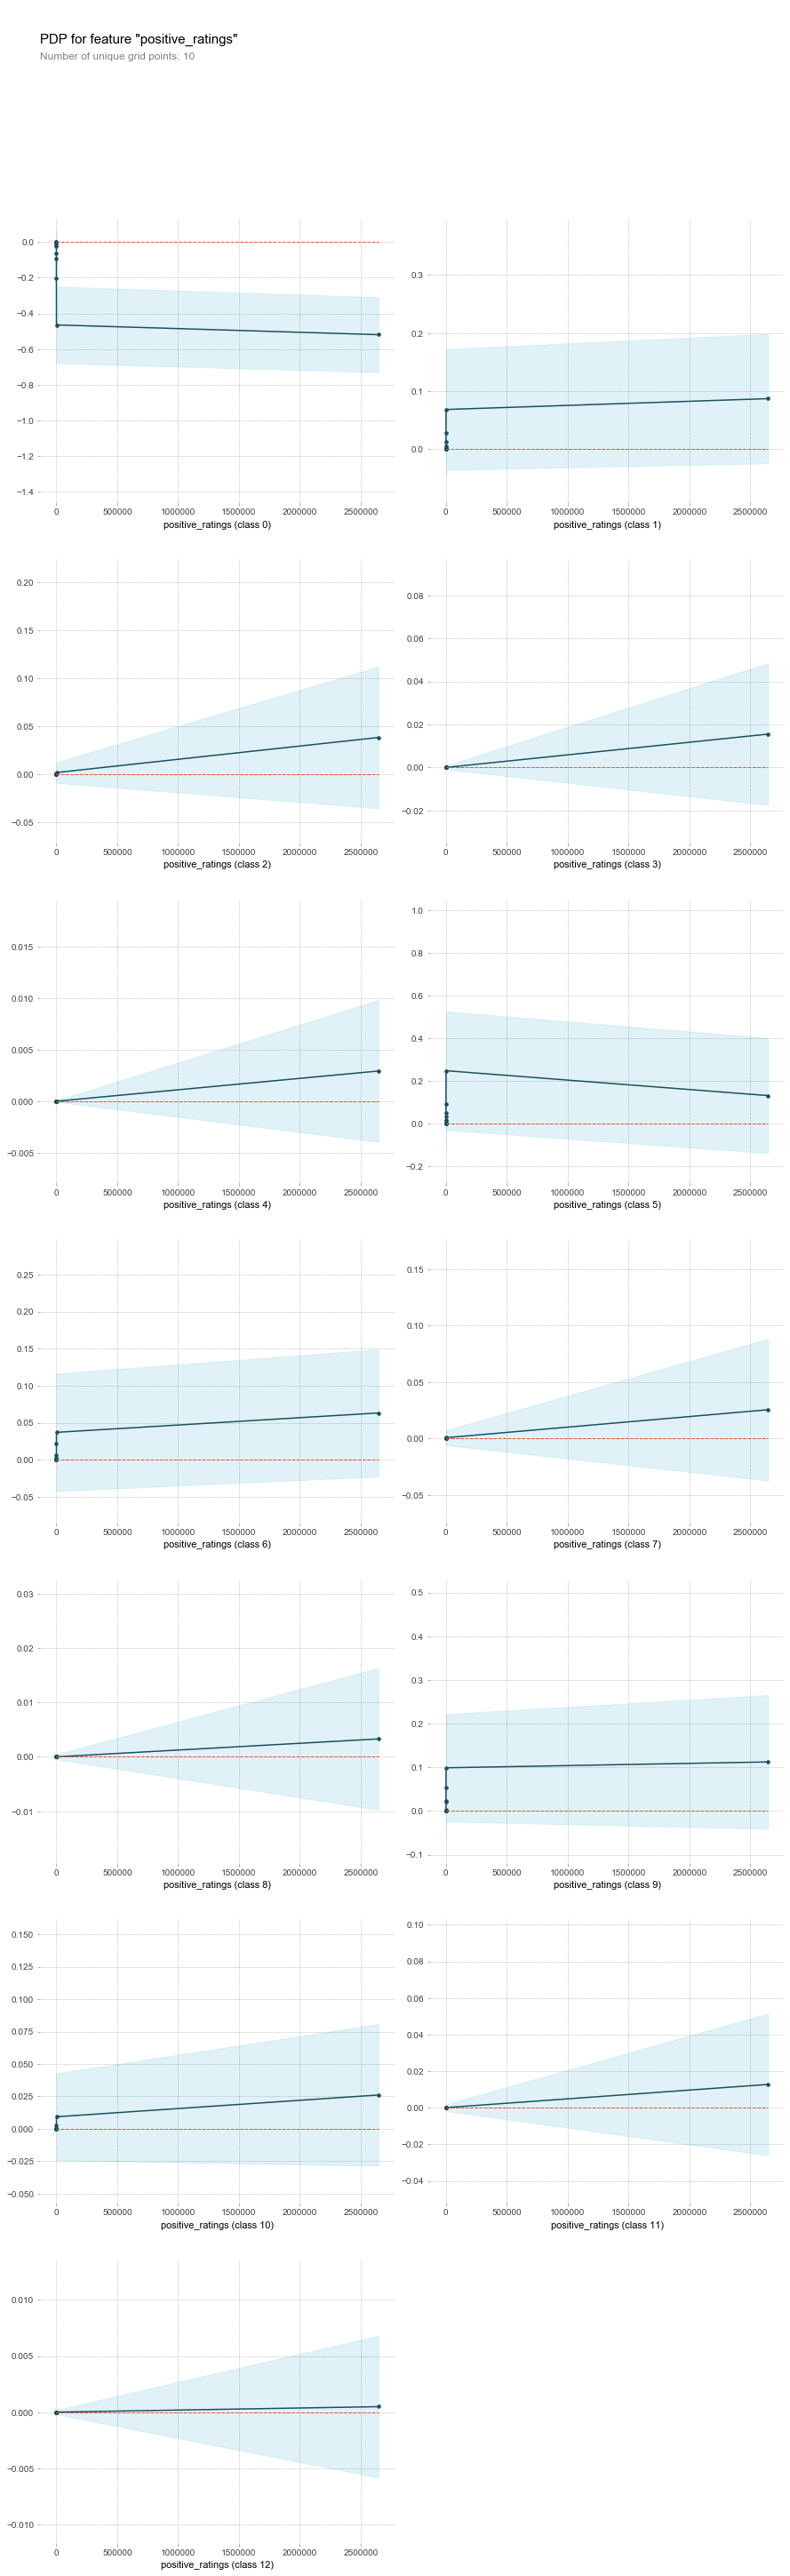

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'positive_ratings'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

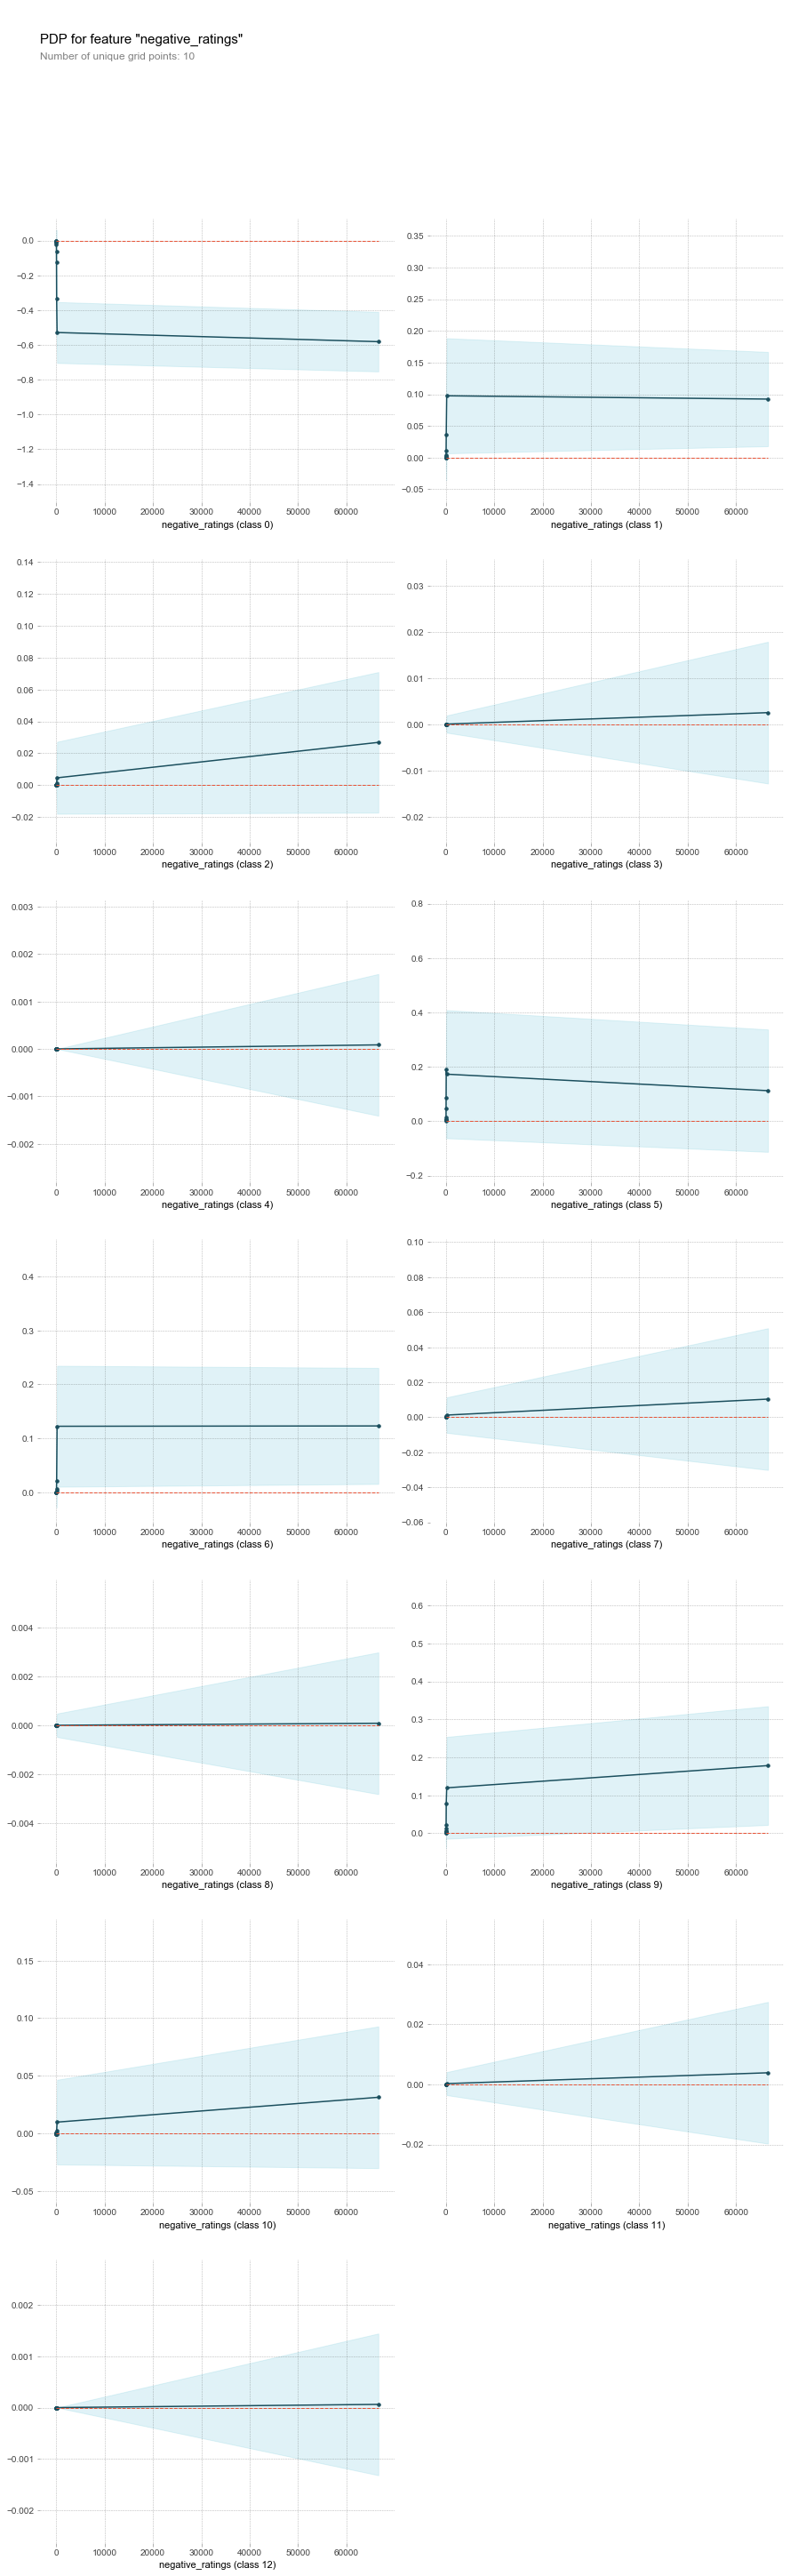

In [39]:
p_feat = 'negative_ratings'

neg_iso = pdp_isolate(
    model=RFC_pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=p_feat
)
pdp_plot(neg_iso, feature_name=p_feat);

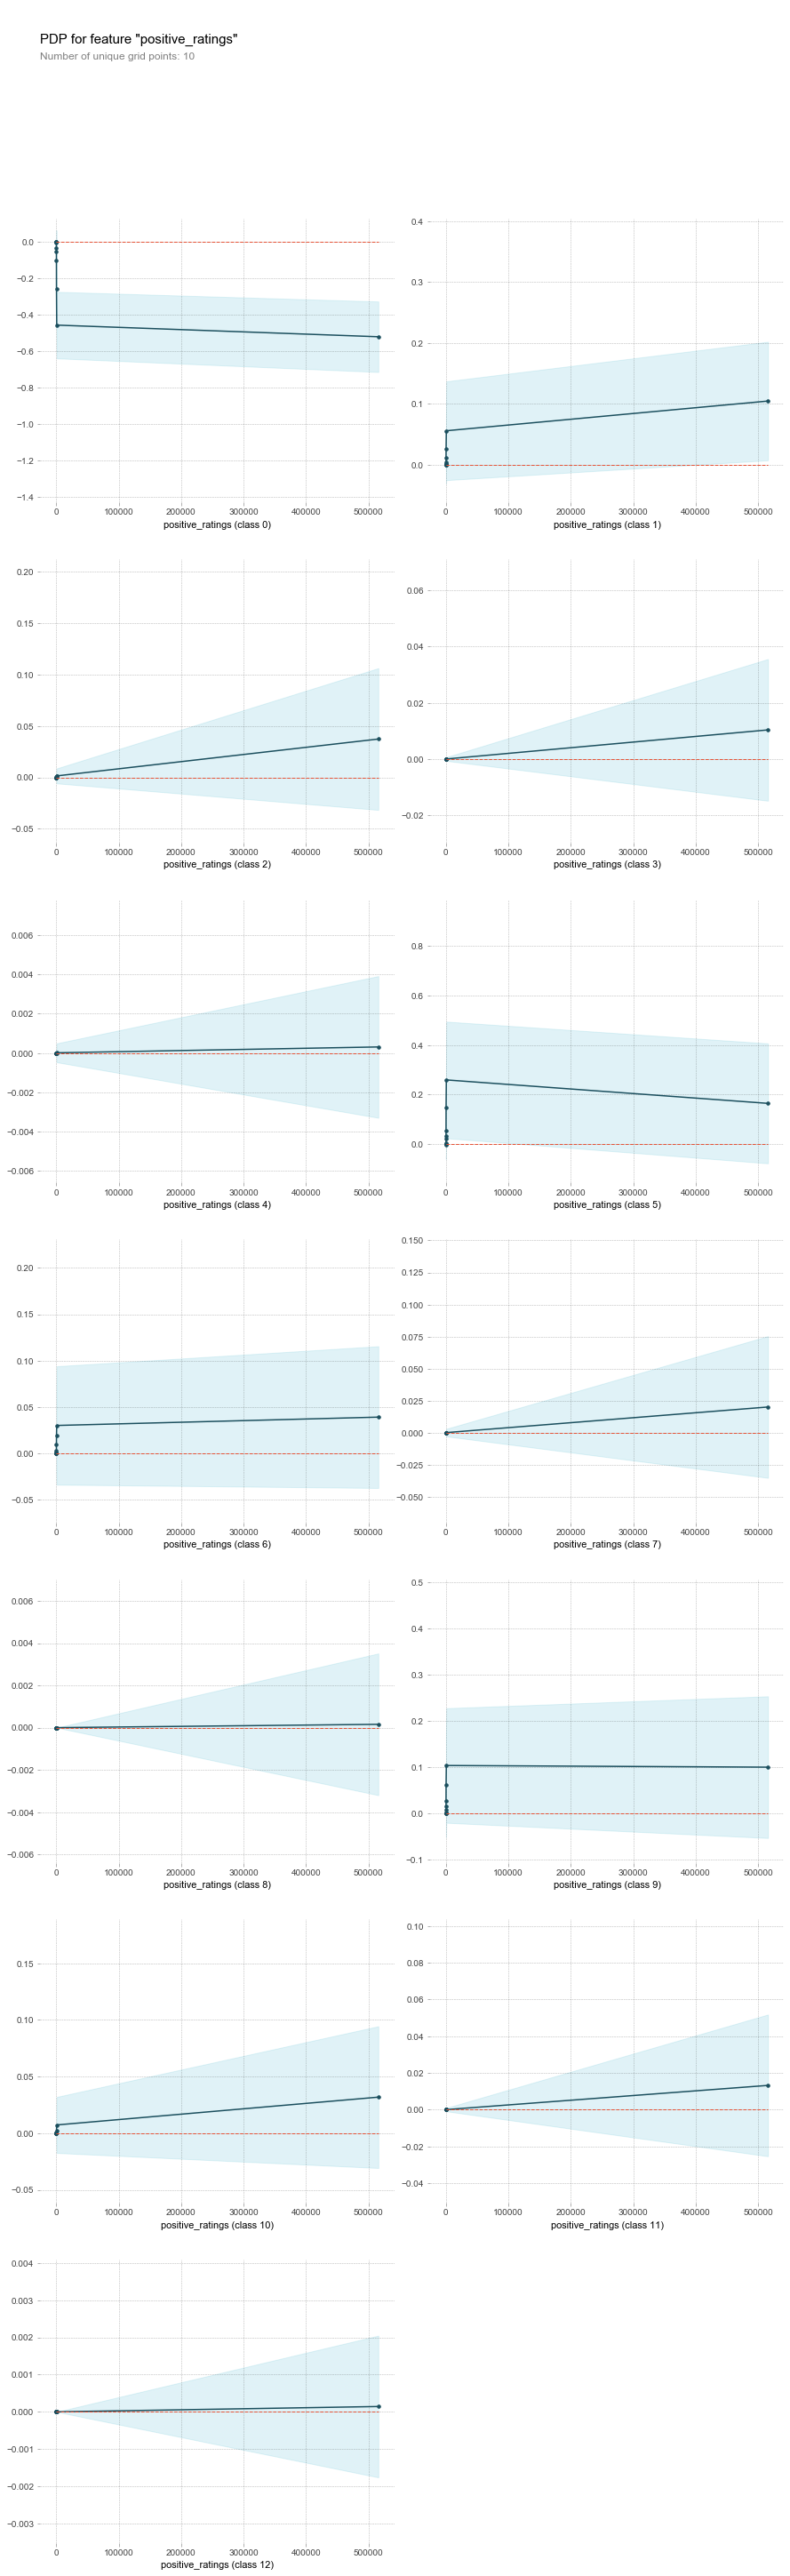

In [38]:
p_feat = 'positive_ratings'
neg_iso = pdp_isolate(
    model=RFC_pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=p_feat
)
pdp_plot(neg_iso, feature_name=p_feat);